In [ ]:
import googleapiclient.discovery

def predict_json(project, model, instances, version=None):
    """Send json data to a deployed model for prediction.

    Args:
        project (str): project where the Cloud ML Engine Model is deployed.
        model (str): model name.
        instances ([Mapping[str: Any]]): Keys should be the names of Tensors
            your deployed model expects as inputs. Values should be datatypes
            convertible to Tensors, or (potentially nested) lists of datatypes
            convertible to tensors.
        version: str, version of the model to target.
    Returns:
        Mapping[str: any]: dictionary of prediction results defined by the
            model.
    """
    # Create the ML Engine service object.
    # To authenticate set the environment variable
    # GOOGLE_APPLICATION_CREDENTIALS=<path_to_service_account_file>
    service = googleapiclient.discovery.build('ml', 'v1')
    name = 'projects/{}/models/{}'.format(project, model)

    if version is not None:
        name += '/versions/{}'.format(version)

    response = service.projects().predict(
        name=name,
        body={'instances': instances}
    ).execute()

    if 'error' in response:
        raise RuntimeError(response['error'])

    return response['predictions']

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
import io

import imghdr
import os

print(tf.__version__)

2.2.0


In [ ]:
""""
# Storing model in Firebase Storage
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Use a service account
if (not len(firebase_admin._apps)):
	cred = credentials.Certificate(r'/content/bangkit-makeup-firebase-adminsdk-xxkse-0853025fb0.json') # IT NEEDS TO BE IN A FOLDER WITHIN THE FILE
  #(r'/content/drive/My Drive/Bangkit_Final_Project/bangkit-makeup-firebase-adminsdk-xxkse-0853025fb0.json')
 #(r'service_account.json')
	firebase_admin.initialize_app(
    cred,
    options={
      'storageBucket': 'gs://bangkit-makeup.appspot.com',
  })
db = firestore.client()
"""""

'"\n# Storing model in Firebase Storage\nimport firebase_admin\nfrom firebase_admin import credentials\nfrom firebase_admin import firestore\n\n# Use a service account\nif (not len(firebase_admin._apps)):\n\tcred = credentials.Certificate(r\'/content/bangkit-makeup-firebase-adminsdk-xxkse-0853025fb0.json\') # IT NEEDS TO BE IN A FOLDER WITHIN THE FILE\n  #(r\'/content/drive/My Drive/Bangkit_Final_Project/bangkit-makeup-firebase-adminsdk-xxkse-0853025fb0.json\')\n #(r\'service_account.json\')\n\tfirebase_admin.initialize_app(\n    cred,\n    options={\n      \'storageBucket\': \'gs://bangkit-makeup.appspot.com\',\n  })\ndb = firestore.client()\n'

In [ ]:
credential_path = "/content/bangkit-makeup-e913a86923af.json"
#'/content/bangkit-makeup-firebase-adminsdk-xxkse-0853025fb0.json'
#"bangkit-makeup-firebase-adminsdk-xxkse-0853025fb0.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

106496/100148 [===============================] - 0s 0us/step


(-0.5, 149.5, 149.5, -0.5)

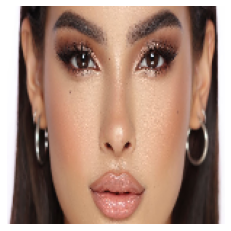

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

file = tf.keras.utils.get_file(
    "test_file.jpeg",
    "https://i.ytimg.com/vi/1thjXzmblyI/maxresdefault.jpg")
img = tf.keras.preprocessing.image.load_img(file, target_size=[150,150,3]
                                            )
plt.imshow(img)
plt.axis('off')

In [ ]:
x = tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])
print(x.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
get_response = predict_json('bangkit-makeup', 'makeup_test_model', x.tolist(), 'v1')

In [ ]:
get_response

[{'dense_3': [8.228651859099045e-05]}]

122880/119235 [==============================] - 0s 1us/step


(-0.5, 149.5, 149.5, -0.5)

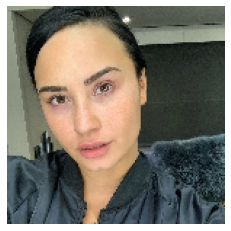

In [ ]:
file_2 = tf.keras.utils.get_file(
    "test_nm.jpeg",
    "https://cdn-image.hipwee.com/wp-content/uploads/2020/03/hipwee-87232136_2880169575360071_1798872882638650715_n.jpg")
img_2 = tf.keras.preprocessing.image.load_img(file_2, target_size=[150,150,3]
                                            )
plt.imshow(img_2)
plt.axis('off')

In [ ]:
x_2 = tf.keras.preprocessing.image.img_to_array(img_2)
print(x_2.shape)
x_2 = tf.keras.applications.mobilenet.preprocess_input(
    x_2[tf.newaxis,...])
print(x_2.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
get_response_2 = predict_json('bangkit-makeup', 'makeup_test_model', x_2.tolist(), 'v1')
print(get_response_2)

[{'dense_3': [0.003407389158383012]}]
